In [1]:
from datetime import datetime, timedelta

import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sys.path.append('..')
from util.stock_loader import Loader

In [2]:
DATA = '../models/qp/data'
SYMBOLS = [
    'AAPL', 'ABMD', 'ABNB', 'AMD', 'AMZN', 'ANET', 'APPH', 'AXON',
    'BROS', 'BYND', 'CHWY', 'COIN', 'COUR', 'CRWD', 'DDOG', 'DKNG',
    'DOCU', 'DUOL', 'EDIT', 'ETSY', 'FLGT', 'FUV', 'FVRR', 'GH', 'GMED',
    'GOOG', 'INTG', 'ISRG', 'JD', 'LSPD', 'LULU','MDB', 'MELI', 'MNST',
    'MSFT', 'MTCH', 'NVCR', 'NVDA', 'NYT', 'OKTA', 'OPEN', 'PANW',
    'PINS', 'PTON', 'QDEL', 'RBLX', 'RDFN', 'RGEN', 'ROKU', 'SE',
    'SHOP', 'SPLK', 'SQ', 'TASK', 'TDOC', 'TEAM', 'TREX', 'TTD', 'TTWO',
    'TWLO', 'TWTR', 'UPST', 'VEEV', 'WK', 'XPEV', 'ZEN', 'ZNGA']
INDICES = ['^GSPC', # S&P 500
           '^IXIC', # Nasdaq
           '^NYA']  # NY Stock Exchange (total)
len(SYMBOLS)

67

In [28]:
N_YEARS = 10 # 5
N_DAYS = int(round(365.25 * N_YEARS))
END = (datetime.now() + timedelta(1)).date()
START = str(END - timedelta(N_DAYS))
START, END

('2012-03-12', datetime.date(2022, 3, 12))

In [29]:
batch = SYMBOLS + INDICES # run all
stock_loader = Loader(batch, START, str(END), verbose=True)
data = stock_loader.download().rename(columns={'Adj Close': 'AdjClose'})

[*********************100%***********************]  70 of 70 completed
Generating derived columns...
   ...AAPL
   ...ABMD
   ...ABNB
   ...AMD
   ...AMZN
   ...ANET
   ...APPH
   ...AXON
   ...BROS
   ...BYND
   ...CHWY
   ...COIN
   ...COUR
   ...CRWD
   ...DDOG
   ...DKNG
   ...DOCU
   ...DUOL
   ...EDIT
   ...ETSY
   ...FLGT
   ...FUV
   ...FVRR
   ...GH
   ...GMED
   ...GOOG
   ...INTG
   ...ISRG
   ...JD
   ...LSPD
   ...LULU
   ...MDB
   ...MELI
   ...MNST
   ...MSFT
   ...MTCH
   ...NVCR
   ...NVDA
   ...NYT
   ...OKTA
   ...OPEN
   ...PANW
   ...PINS
   ...PTON
   ...QDEL
   ...RBLX
   ...RDFN
   ...RGEN
   ...ROKU
   ...SE
   ...SHOP
   ...SPLK
   ...SQ
   ...TASK
   ...TDOC
   ...TEAM
   ...TREX
   ...TTD
   ...TTWO
   ...TWLO
   ...TWTR
   ...UPST
   ...VEEV
   ...WK
   ...XPEV
   ...ZEN
   ...ZNGA
   ...^GSPC
   ...^IXIC
   ...^NYA


In [30]:
data['Date'].tail()

2513   2022-03-07
2514   2022-03-08
2515   2022-03-09
2516   2022-03-10
2517   2022-03-11
Name: Date, dtype: datetime64[ns]

In [31]:
spx = data['DayToDayChange']['^GSPC']
spx = spx[1:]
#spx = spx / spx[1]
spx

1       1.018132
2       0.998804
3       1.005967
4       1.001119
5       1.003974
          ...   
2513    0.970482
2514    0.992766
2515    1.025698
2516    0.995708
2517    0.987038
Name: ^GSPC, Length: 2517, dtype: float64

In [32]:
data['DayToDayChange'].quantile(q=[0.75], axis=1).T[1:]

,0.75
1,1.020267
2,0.999480
3,1.015279
4,1.004820
5,1.009951
...,...
2513,0.971878
2514,1.011356
2515,1.070202
2516,0.996189


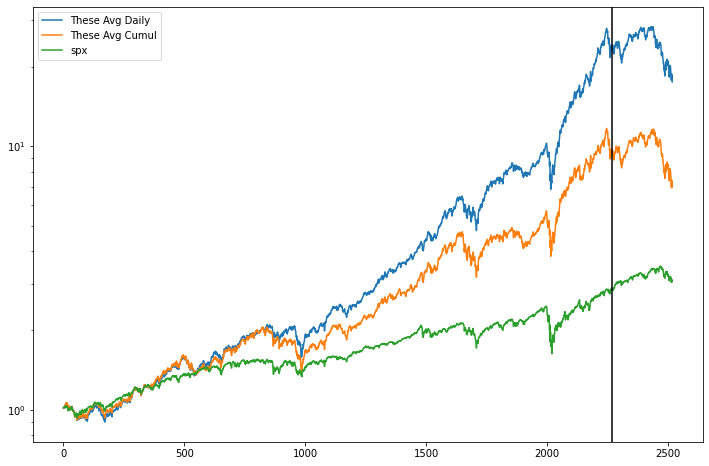

In [33]:
plt.figure(figsize=[12, 8])
plt.plot(data['DayToDayChange'].mean(axis=1)[1:].cumprod(), 
         label='These Avg Daily')
plt.plot(data['DayToDayChange'].cumprod().mean(axis=1),
         label='These Avg Cumul')
plt.plot(spx.cumprod(), label='spx')
plt.yscale('log')
plt.legend();

n = len(spx)
one_year = n - 250
plt.axvline(x=one_year, color='k');

In [39]:
out = pd.DataFrame(data.Date)
out['mine1'] = data['DayToDayChange'].mean(axis=1)[1:].cumprod()
out['mine2'] = data['DayToDayChange'].cumprod().mean(axis=1)
out.head()

,Date,mine1,mine2
0,2012-03-12,NaN,NaN
1,2012-03-13,1.014781,1.014781
2,2012-03-14,1.011781,1.011776
3,2012-03-15,1.020891,1.020975
4,2012-03-16,1.020973,1.021016


In [40]:
out.tail()

,Date,mine1,mine2
2513,2022-03-07,17.839527,7.034305
2514,2022-03-08,17.796870,6.958064
2515,2022-03-09,18.763963,7.417718
2516,2022-03-10,18.418532,7.284544
2517,2022-03-11,17.523991,7.002687


In [43]:
!ls ../data

dev_quantiles.csv    nasdaq1965.csv       sp1950.csv
historic.csv         nya1965.csv          wilshire1990.csv
myHistoric.RData     pct_params
myHistoricTest.RData scoring.csv


In [45]:
out.iloc[1:, :].to_csv('../data/mine.csv', index=False)

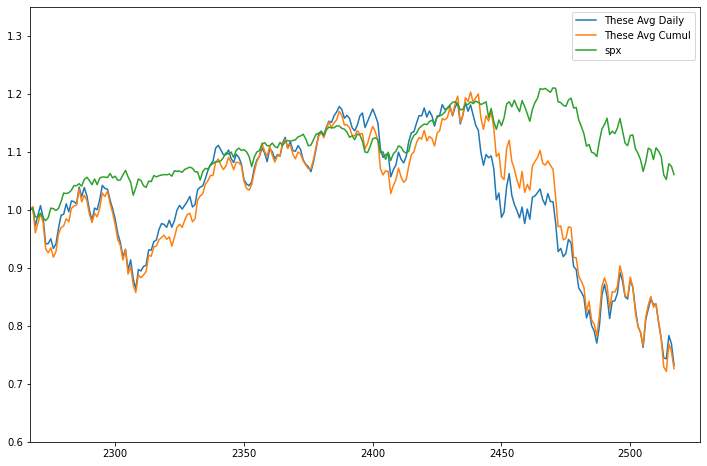

In [34]:
plt.figure(figsize=[12, 8])
a = data['DayToDayChange'].mean(axis=1)[1:].cumprod()
n = len(a)
start = n - 250
a = a / a[start]
b = data['DayToDayChange'].cumprod().mean(axis=1)
b = b / b[start]
s = spx.cumprod()
s = s / s[start]
plt.plot(a, label='These Avg Daily')
plt.plot(b, label='These Avg Cumul')
plt.plot(s, label='spx')
#plt.yscale('log')
plt.xlim([one_year, n + 10])
plt.ylim(0.6, 1.35)
plt.legend();

In [10]:
def get_stock_data(stock, data):
    sub = data.loc[
        :,  
        [x for x in list(data) if x[1] == stock]]
    first_value = (sub.Value[stock][sub.Value[stock].notna()]
                   .index[0])
    sub = sub.loc[first_value:, :]
    sub.columns = sub.columns.to_series().apply(lambda x: x[0])
    sub.fillna(method='ffill', inplace=True)
    return sub

In [11]:
rblx = get_stock_data('SE', data)
rblx.head()

,Value,Close,High,Low,Open,LogValue,IntradayChange,DayToDayChange,OvernightChange
155,16.26,16.26,16.990,14.00,16.25,2.788708,1.000615,NaN,NaN
156,15.26,15.26,16.399,15.12,16.10,2.725235,0.947826,0.938499,0.990160
157,15.24,15.24,15.860,14.77,15.40,2.723924,0.989610,0.998689,1.009174
158,13.73,13.73,15.430,13.62,15.10,2.619583,0.909271,0.900919,0.990814
159,14.02,14.02,14.160,13.81,13.82,2.640485,1.014472,1.021122,1.006555


In [12]:
rblx = rblx[['Value', 'Close', 'High', 'Low']]
rblx.head()

,Value,Close,High,Low
155,16.26,16.26,16.990,14.00
156,15.26,15.26,16.399,15.12
157,15.24,15.24,15.860,14.77
158,13.73,13.73,15.430,13.62
159,14.02,14.02,14.160,13.81


In [13]:
rblx['NextHigh'] = rblx.High.shift(-1)
rblx['NextLow'] = rblx.Low.shift(-1)
rblx['HighMult'] = rblx.NextHigh / rblx.Close
rblx['LowMult'] = rblx.NextLow / rblx.Close
rblx.head()

,Value,Close,High,Low,NextHigh,NextLow,HighMult,LowMult
155,16.26,16.26,16.990,14.00,16.399,15.12,1.008549,0.929889
156,15.26,15.26,16.399,15.12,15.860,14.77,1.039318,0.967890
157,15.24,15.24,15.860,14.77,15.430,13.62,1.012467,0.893701
158,13.73,13.73,15.430,13.62,14.160,13.81,1.031318,1.005827
159,14.02,14.02,14.160,13.81,14.130,13.80,1.007846,0.984308


0.05    0.990294
Name: HighMult, dtype: float64


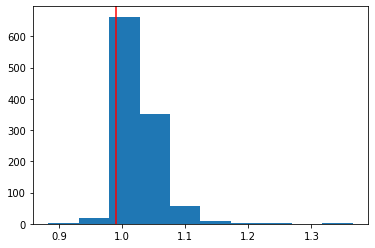

In [14]:
# For selling:
high_05 = rblx.HighMult.quantile(q=[0.05])
print(high_05)
plt.hist(rblx.HighMult)
plt.axvline(x=high_05[0.05], color='red');

1.013954251274041


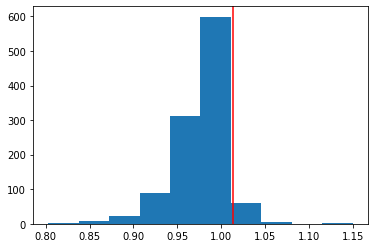

In [15]:
# For buying:
low_95 = rblx.LowMult.quantile(q=[0.95])
print(low_95.tolist()[0])
plt.hist(rblx.LowMult)
plt.axvline(x=low_95[0.95], color='red');

In [16]:
def get_hilo_mult(stock, ci=0.95):
    stock['NextHigh'] = stock.High.shift(-1)
    stock['NextLow'] = stock.Low.shift(-1)
    stock['HighMult'] = stock.NextHigh / stock.Close
    stock['LowMult'] = stock.NextLow / stock.Close
    sell_pt = stock.HighMult.quantile(q=[1 - ci]).tolist()[0]
    buy_pt = stock.LowMult.quantile(q=[ci]).tolist()[0]
    return buy_pt, sell_pt

In [17]:
get_hilo_mult(rblx)

(1.013954251274041, 0.9902936291345401)

In [18]:
aapl = get_stock_data('AAPL', data)
get_hilo_mult(aapl)

(1.0095640632300005, 0.9934419691056111)

In [19]:
def get_macd(stock_data, fast=60, slow=90, signal=80):
    df = stock_data.copy()
    exp1 = df.Value.ewm(span=fast, adjust=False).mean()
    exp2 = df.Value.ewm(span=slow, adjust=False).mean()
    macd = exp1 - exp2
    exp3 = macd.ewm(span=signal, adjust=False).mean()
    histo = macd - exp3
    hdiff = histo.diff(1)
    is_rising = 1 * (hdiff > 0)
    return is_rising

In [20]:
rblx['Trend'] = get_macd(rblx)
rblx.head()

,Value,Close,High,Low,NextHigh,NextLow,HighMult,LowMult,Trend
155,16.26,16.26,16.990,14.00,16.399,15.12,1.008549,0.929889,0
156,15.26,15.26,16.399,15.12,15.860,14.77,1.039318,0.967890,0
157,15.24,15.24,15.860,14.77,15.430,13.62,1.012467,0.893701,0
158,13.73,13.73,15.430,13.62,14.160,13.81,1.031318,1.005827,0
159,14.02,14.02,14.160,13.81,14.130,13.80,1.007846,0.984308,0


In [21]:
def get_hilo_mults(stock, ci=0.95):
    stock['Trend'] = get_macd(stock)
    stock['NextHigh'] = stock.High.shift(-1)
    stock['NextLow'] = stock.Low.shift(-1)
    stock['HighMult'] = stock.NextHigh / stock.Close
    stock['LowMult'] = stock.NextLow / stock.Close
    upward = stock[stock.Trend == 1]
    downward = stock[stock.Trend == 0]
    sell_pt_up = upward.HighMult.quantile(q=[1 - ci]).tolist()[0]
    buy_pt_up = upward.LowMult.quantile(q=[ci]).tolist()[0]
    sell_pt_down = downward.HighMult.quantile(q=[1 - ci]).tolist()[0]
    buy_pt_down = downward.LowMult.quantile(q=[ci]).tolist()[0]
    return buy_pt_up, sell_pt_up, buy_pt_down, sell_pt_down

In [22]:
get_hilo_mults(rblx)

(1.0099395561865485, 0.991877848426489, 1.0174909304081967, 0.9879597764860499)

In [23]:
get_hilo_mults(aapl)

(1.0081160041377606, 0.996109414399617, 1.0111012438463562, 0.9889868040728327)

In [24]:
out = []
for symbol in batch:
    stock = get_stock_data(symbol, data)
    mults = get_hilo_mults(stock)
    out.append([symbol, *mults])
df = pd.DataFrame(
    out, 
    columns=['stock', 'buy_pt_up', 'sell_pt_up', 'buy_pt_down', 
             'sell_pt_down'])
df.head()

,stock,buy_pt_up,sell_pt_up,buy_pt_down,sell_pt_down
0,AAPL,1.008116,0.996109,1.011101,0.988987
1,ABMD,1.004655,0.997460,1.006094,0.996760
2,ABNB,1.006382,0.994851,1.011152,0.983556
3,AMD,1.013439,0.993345,1.013885,0.990894
4,AMZN,1.005916,0.996697,1.008614,0.993211


In [25]:
last = data.index.max()
price = pd.DataFrame(data.loc[last, 'Value'])
price.columns = ['price']
price['stock'] = price.index
price

,price,stock
AAPL,154.729996,AAPL
ABMD,286.790009,ABMD
ABNB,145.139999,ABNB
AMD,104.290001,AMD
AMZN,2910.48999,AMZN
...,...,...
ZEN,113.970001,ZEN
ZNGA,9.05,ZNGA
^GSPC,4204.310059,^GSPC
^IXIC,12843.807617,^IXIC


In [26]:
df = df.merge(price, how='left', on='stock')
df.head()

,stock,buy_pt_up,sell_pt_up,buy_pt_down,sell_pt_down,price
0,AAPL,1.008116,0.996109,1.011101,0.988987,154.729996
1,ABMD,1.004655,0.997460,1.006094,0.996760,286.790009
2,ABNB,1.006382,0.994851,1.011152,0.983556,145.139999
3,AMD,1.013439,0.993345,1.013885,0.990894,104.290001
4,AMZN,1.005916,0.996697,1.008614,0.993211,2910.48999


In [27]:
df.to_csv('mults.csv', index=False)
!open ./mults.csv